In [8]:
import pandas as pd

# File paths 
lines_file = 'movie_lines.txt'
conversations_file = 'movie_conversations.txt'
characters_file = 'movie_characters_metadata.txt'
titles_file = 'movie_titles_metadata.txt'

# Open the file with errors='replace' to handle invalid characters
with open(lines_file, 'r', encoding='utf-8', errors='replace') as file:
    movie_lines_df = pd.read_csv(file, delimiter=' \+\+\+\$\+\+\+ ', engine='python', header=None, names=['lineID', 'characterID', 'movieID', 'character_name', 'text'])

with open(conversations_file, 'r', encoding='utf-8', errors='replace') as file:
    movie_conversations_df = pd.read_csv(file, delimiter=' \+\+\+\$\+\+\+ ', engine='python', header=None, names=['characterID1', 'characterID2', 'movieID', 'lines'])

with open(characters_file, 'r', encoding='utf-8', errors='replace') as file:
    movie_characters_df = pd.read_csv(file, delimiter=' \+\+\+\$\+\+\+ ', engine='python', header=None, names=['characterID', 'character_name', 'movieID', 'movie_title', 'gender', 'credit_position'])

with open(titles_file, 'r', encoding='utf-8', errors='replace') as file:
    movie_titles_df = pd.read_csv(file, delimiter=' \+\+\+\$\+\+\+ ', engine='python', header=None, names=['movieID', 'movie_title', 'year', 'rating', 'votes', 'genres'])

# Inspect the data structure (ensure everything loaded correctly)
print(movie_lines_df.head())
print(movie_conversations_df.head())
print(movie_characters_df.head())
print(movie_titles_df.head())

# Basic statistics
# Number of unique movies, characters, and dialogues
num_movies = movie_titles_df['movieID'].nunique()
num_characters = movie_characters_df['characterID'].nunique()
num_dialogues = movie_lines_df['lineID'].nunique()

# Dialogues per movie
dialogues_per_movie = movie_lines_df.groupby('movieID').size()

# Gender distribution
gender_counts = movie_characters_df['gender'].value_counts()

# Average number of lines per conversation
movie_conversations_df['num_lines'] = movie_conversations_df['lines'].apply(lambda x: len(eval(x)))

# Display basic statistics
print(f"Number of unique movies: {num_movies}")
print(f"Number of unique characters: {num_characters}")
print(f"Number of unique dialogues: {num_dialogues}")
print(f"Average number of dialogues per movie: {dialogues_per_movie.mean()}")
print(f"Average number of lines per conversation: {movie_conversations_df['num_lines'].mean()}")

  lineID characterID movieID character_name          text
0  L1045          u0      m0         BIANCA  They do not!
1  L1044          u2      m0        CAMERON   They do to!
2   L985          u0      m0         BIANCA    I hope so.
3   L984          u2      m0        CAMERON     She okay?
4   L925          u0      m0         BIANCA     Let's go.
  characterID1 characterID2 movieID                             lines
0           u0           u2      m0  ['L194', 'L195', 'L196', 'L197']
1           u0           u2      m0                  ['L198', 'L199']
2           u0           u2      m0  ['L200', 'L201', 'L202', 'L203']
3           u0           u2      m0          ['L204', 'L205', 'L206']
4           u0           u2      m0                  ['L207', 'L208']
  characterID character_name movieID                 movie_title gender  \
0          u0         BIANCA      m0  10 things i hate about you      f   
1          u1          BRUCE      m0  10 things i hate about you      ?   
2      

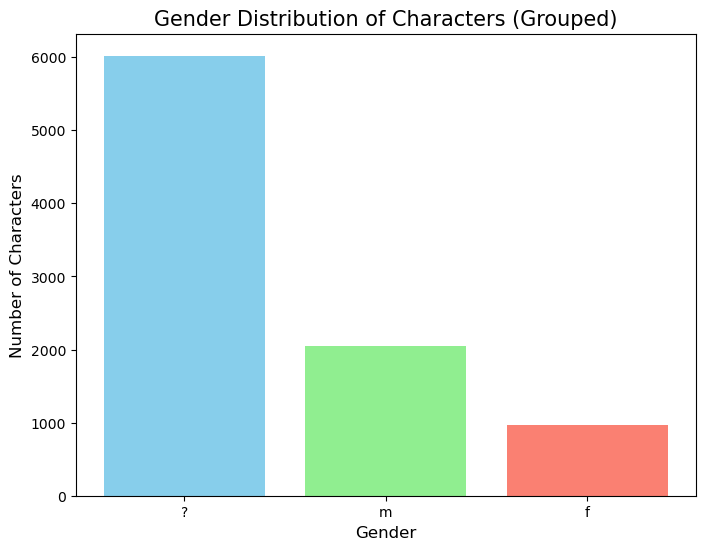

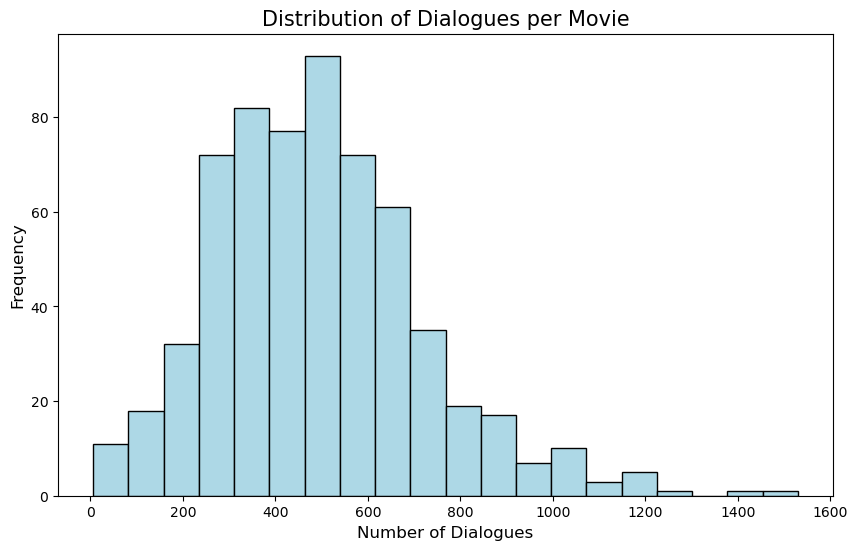

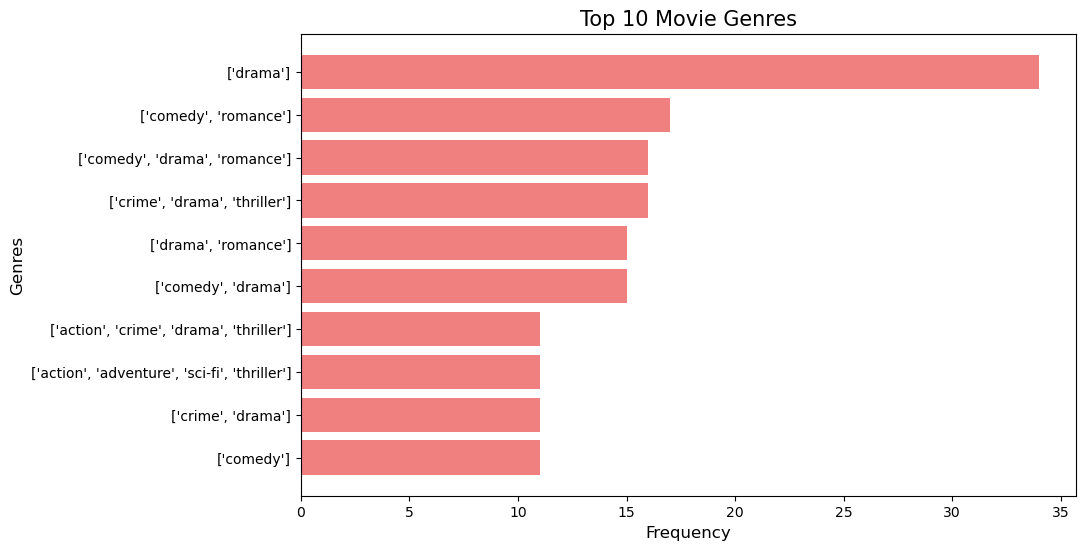

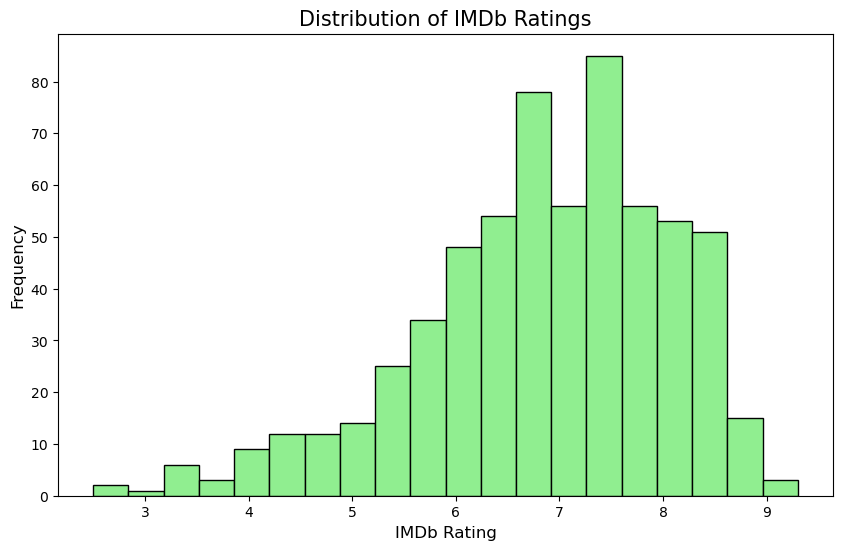

In [12]:
import matplotlib.pyplot as plt

# 1. Gender Distribution

# Normalize the gender values by converting them to lowercase
movie_characters_df['gender'] = movie_characters_df['gender'].str.lower()

# Recalculate gender distribution after grouping
gender_counts = movie_characters_df['gender'].value_counts()

# Visualize the gender distribution after grouping
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightgreen', 'salmon', 'purple', 'orange'])
plt.title("Gender Distribution of Characters (Grouped)", fontsize=15)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Characters", fontsize=12)
plt.show()


# 2. Distribution of Dialogues per Movie
plt.figure(figsize=(10, 6))
plt.hist(dialogues_per_movie, bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of Dialogues per Movie", fontsize=15)
plt.xlabel("Number of Dialogues", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# 3. Top 10 Genres Distribution
top_genres = movie_titles_df['genres'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_genres.index, top_genres.values, color='lightcoral')
plt.title("Top 10 Movie Genres", fontsize=15)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.gca().invert_yaxis()
plt.show()

# 4. Movie Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(movie_titles_df['rating'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of IMDb Ratings", fontsize=15)
plt.xlabel("IMDb Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [10]:
# Key metrics summary
key_stats = {
    "Number of Movies": num_movies,
    "Number of Characters": num_characters,
    "Number of Dialogues": num_dialogues,
    "Average Dialogues per Movie": dialogues_per_movie.mean(),
    "Maximum Dialogues in a Movie": dialogues_per_movie.max(),
    "Minimum Dialogues in a Movie": dialogues_per_movie.min(),
    "Average Number of Lines per Conversation": movie_conversations_df['num_lines'].mean(),
    "Average IMDb Rating": movie_titles_df['rating'].mean()
}

# Display key metrics
key_stats_df = pd.DataFrame([key_stats])
print(key_stats_df)

   Number of Movies  Number of Characters  Number of Dialogues  \
0               617                  9035               304713   

   Average Dialogues per Movie  Maximum Dialogues in a Movie  \
0                   493.862237                          1530   

   Minimum Dialogues in a Movie  Average Number of Lines per Conversation  \
0                             6                                  3.666955   

   Average IMDb Rating  
0             6.863857  
